In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.special import jn                # Import Bessel function.
from matplotlib.colors import LightSource

# Get colormaps to use with lighting object.
from matplotlib import cm

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-3.0:3.0:30j, -3.0:3.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

def muSigma():
    mu = np.array([random.uniform(-2,2) for i in range(2)])
    sigma1 = random.uniform(1,3)
    sigma2 = random.uniform(1,3)
    sigma12 = random.uniform(min(sigma1,sigma2)/1.2,min(sigma1,sigma2))

    covariance = np.array([[sigma1,sigma12],[sigma12,sigma2]])
    return (mu,covariance)

In [53]:

mu, covariance = muSigma()

mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

mu = np.array([1, -1])
covariance = np.array([[1,0.5],[0.8,1]])

z = z+ multivariate_normal.pdf(xy, mean=mu, cov=covariance)
# for i in range(500):
#     mu, covariance = muSigma()
#     z = z+multivariate_normal.pdf(xy, mean=mu, cov=covariance)


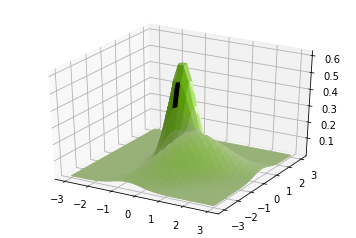

In [61]:

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)



fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

light = LightSource(90, 45)

rgb = np.ones((z.shape[0], z.shape[1], 3))
green = np.array([200,236,156])  # This color is borrowed from dribbble.com; the hex code is converted to rgb
green_surface = light.shade_rgb(rgb * green, z)

ax.plot_surface(x,y,z,
                facecolors=green_surface)
#ax.plot_wireframe(x,y,z)

plt.show()

In [66]:
?mlab.bivariate_normal

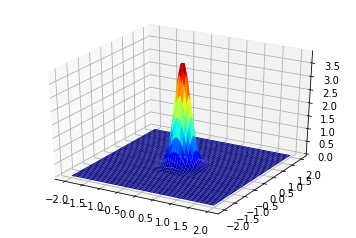

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import numpy as np

def P(X, Y,sigma1,sigma2,mu1,mu2,sigma12):
    return mlab.bivariate_normal(X, Y, sigma1,sigma2,mu1,mu2,sigma12)      

fig = plt.figure()
ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-2, 2, 60)
y = np.linspace(-2, 2, 60)
X, Y = np.meshgrid(x, y)
Z = P(X, Y,0.2,0.2,0,0,0)
surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(0, Z.max())

plt.show()